# Discrete Time Systems (2.2)

## What are Systems?
* Mathematically: transformation that maps input signal ($x[n]$) to output signal ($y[n]$)

$y[n] = T\{x[n]\}$

* Pictoral representation
* $y[n]$ at time $n$ can depend on any part of the entire sequence of $x[n]$

### Examples
* Moving average: $y[n] = \frac{1}{2N+1} \sum_{k=-N}^{N} x[n]$
* Fixed delay: $y[n] = x[n-n_d]$
* Fixed advance: $y[n] = x[n+n_a]$
* First backward difference: $y[n] = x[n] - x[n-1]$
* Accumulator: $y[n] = \sum_{k=-\infty}^{n} x[k]$


## Properties
This section is about properties of systems, not signals


### Memoryless Systems (2.2.1)
* Output $y[n]$ for all $n$ only depends on the input $x[n]$ at time $n$

### Linear Systems (2.2.2)
Must satisfy two properties

#### Additive Property

$T\{x_1[n]\} = y_1[n]$

$T\{x_2[n]\} = y_2[n]$

$T\{x_1[n] + x_2[n]\} = T\{x_1[n]\} + T\{x_2[n]\} = y_1[n] + y_2[n] $

#### Scaling or Homogeneity Property

$ T\{x[n]\} = y[n]$

$ T\{a x[n]\} = ay[n]$

If both properties are true, then

$T\{a x_1[n] + b x_2[n]\} = a T\{x_1[n]\} + b T\{x_2[n]\} = a y_1[n] + b y_2[n] $

And more generally

$T\{x_k[n]\} = y_k[n] $
    
$x[n] = \sum_k a_k x_k[n]$

$y[n] = \sum_k a_k y_k[n]$

### Time-Invariant Systems (2.2.3)
Suppose a system results in $y[n] = T\{x[n]\}$. The system is time invariant then only if the application of a delayed input sequence produces the same output sequence delayed by the same amount. In other words,

$y[n-n_d] = T\{x[n-n_d]\}$

for all possible delays or advances $n_d$ and all possible input sequences

* One of the more difficult properties to determine for a given system
* Two steps
    * Calculate output for a signal and delay it $y[n-n_0]$
    * Calculate output for the delayed signal $x_1[n] = x[n-n_0]$
    * Compare
* A single counter-example is sufficient to show not time invariant
* Most time varying systems have an explicit dependence on time (e.g., $y[n] = n + x[n]$)

### Causal Systems (2.2.4)
Causal if at every time $n$ the output of the system only depends on the past and present values of the input signal $x[n]$.

### Stable Systems (2.2.5)
* Many definitions of stability
* We use bounded-input bounded-output (BIBO) stability

A system is stable if for every bounded input sequence, there is a bounded output sequence

$|x[n]| \leq B_x < \infty  \text{ for all } n$

Then a system is stable if and only if there exists a fixed positive finite value $B_y$ such that

$|y[n]| \leq B_y < \infty  \text{ for all } n$

Must also be true in the limits as $n \rightarrow -\infty$ and $n \rightarrow \infty$

# LTI Systems (2.3)

* We will focus on systems that are both linear and time-invariant
* Includes essentially all frequency-selective filter designs
* LTI systems have many important and useful properties
* LTI systems naturally often occur in the world due to physics
     * Similar to ordinary differential equations
     * Ordinary difference equations
* We have a lot of knowledge and tools for designing LTI systems


## Impulse Response
If a system is LTI and we know the impulse response, 

$y[n] = T\{\delta[n]\} = h[n]$

we have

$x[n] = \sum_{k=-\infty}^{\infty} x[k] \delta[n-k]$

Then immediately we know

$y[n] = \sum_{k=-\infty}^{\infty} x[k] h[n-k]$

* Called the **convolution sum**
* Very similar to a convolution integral
    * But we can actually use it for computation, unlike the integral
    * And we will
* Note that this means the LTI system is completely (sort of) characterized by the impulse response
* This means we can use the impulse response to determine the output for any input, at least theoretically
* Sometimes denoted as $y[n] = x[n] \ast h[n]$


* Useful and interesting tool for understanding LTI systems (and filters)
* What does the impulse response mean?
     * Map of coefficients for past values of the input signal
     * Gives you a good sense of how much memory the system has
     * Gives you a good sense of how long you have to wait for edge effects to die out
     * Gives you a good sense of minimal signal duration that you can apply the system to



# Properties of LTI Systems (2.4)

## Commutative

$x[n] \ast h[n] = h[n] \ast x[n]$

## Distributes Over Addition

$x[n] \ast (h_1[n] + h_2[n]) = x[n] \ast h_1[n] + x[n] \ast h_2[n]$

Parallel equivalence

## Associative

$x[n] \ast \left( h_1[n] \ast h_2[n]\right) = \left(x[n] \ast h_1[n] \right) \ast h_2[n]$

Cascade equivalence

## Causal
If and only if $h[n] = 0$ for $n<0$

## Stable (BIBO)
If and only if impulse response is absolutely summable. That is, there is a finite positive number $B_h$ such that 

$\sum_{k=-\infty}^{\infty} |h[n]| \leq B_h < \infty$

## Impulse Response Duration
* Infinite-duration impulse responses (IIR) may or may not be stable
* Finite-duration impulse response (FIR) systems are always stable
* Any non-causal FIR system can be made causal by cascading with a sufficient delay

## Inverse Systems
* Example: accumulator and backward difference 
* Note that both systems are causal
* Hard to solve for, but $z$ transform (later) provides a method 

Generally, since $x[n] \ast \delta[n] = x[n]$

$h[n] \ast h_i[n] = h_i[n] \ast h[n] = \delta[n]$

In [59]:
import matplotlib.pyplot as plt
import numpy as np

def PlotImpulseResponse(n,h):
    figure = plt.figure()
    figure.set_size_inches(15,5)
    axes = figure.gca() #add_subplot(111, projection='3d')

    axes.plot(n,h,marker='.',linestyle='None',color='b',markersize=10)
    axes.plot([n,n],[np.zeros_like(h),h],color='b')
    axes.axhline(0,linestyle=':',color='k')
    axes.axvline(0,linestyle=':',color='k')
    axes.set_xlabel('Samples (n)')
    axes.set_ylabel('h[n]')
    axes.set_title('Impulse Response Example')
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)

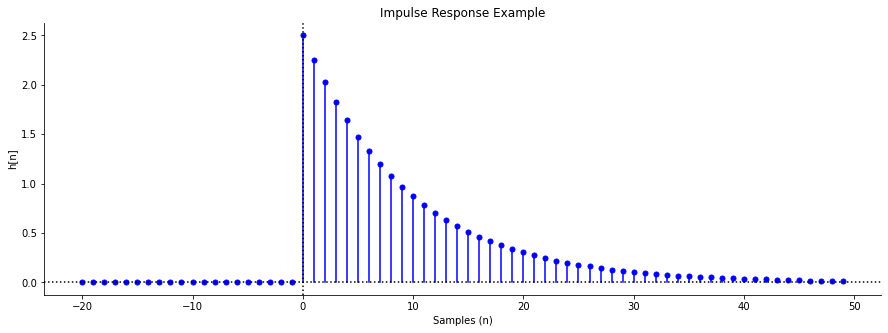

In [60]:
A     = 2.5
alpha = 0.9

n = np.arange(-20,50)
h = A * (alpha**n) * (n>=0)

PlotImpulseResponse(n,h)

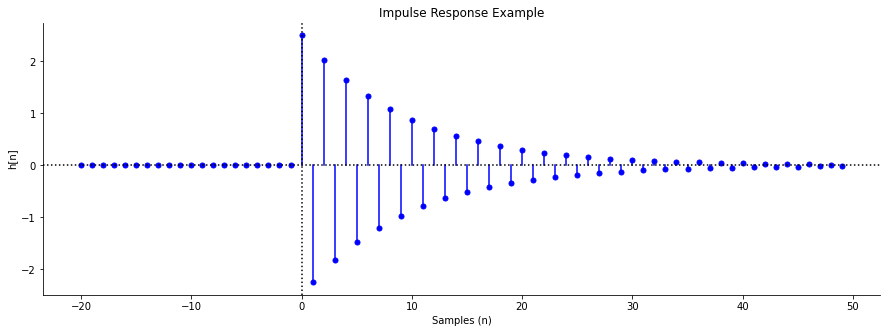

In [61]:
A     = 2.5
alpha = -0.9

n = np.arange(-20,50)
h = A * (alpha**n) * (n>=0)

PlotImpulseResponse(n,h)

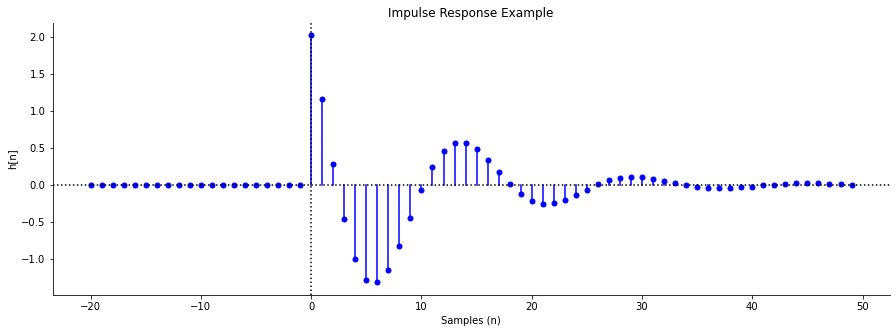

In [62]:
A     = 2.5
alpha = 0.9
omega = 0.4
theta = 0.2*np.pi

n = np.arange(-20,50)
h = A * (alpha**n) * np.cos(omega*n + theta) * (n>=0)

PlotImpulseResponse(n,h)

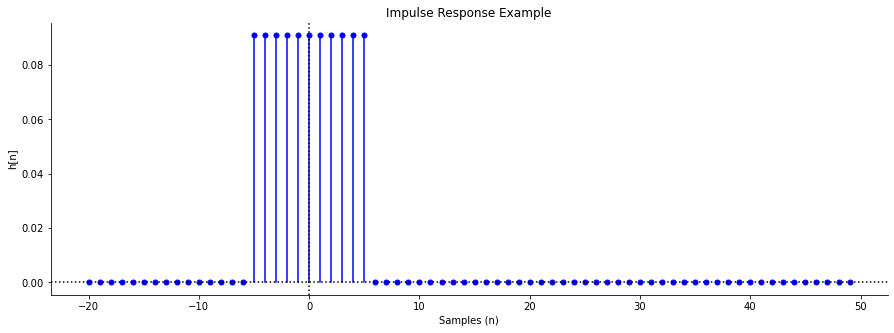

In [63]:
N = 5

n = np.arange(-20,50)
h = (n>=-N) * (n<=N)
h = h/(2*N+1)

PlotImpulseResponse(n,h)

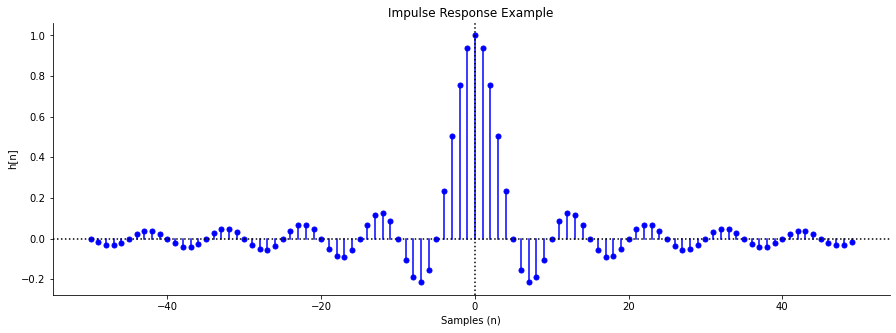

In [64]:
n = np.arange(-50,50)
h = np.sinc(0.2*n)

PlotImpulseResponse(n,h)

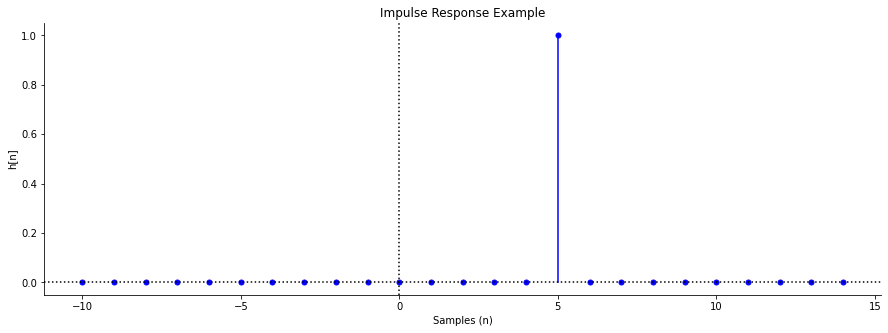

In [65]:
N = 5

n = np.arange(-10,15)
h = np.zeros_like(n)
h[n==N] = 1

PlotImpulseResponse(n,h)

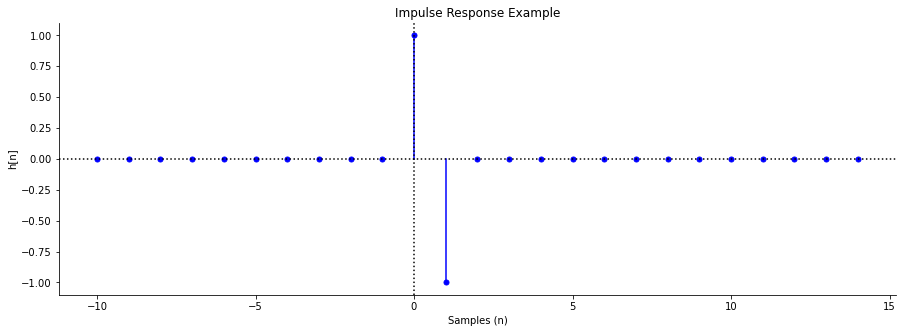

In [66]:
n = np.arange(-10,15)
h = np.zeros_like(n)
h[n==0] = 1
h[n==1] = -1

PlotImpulseResponse(n,h)

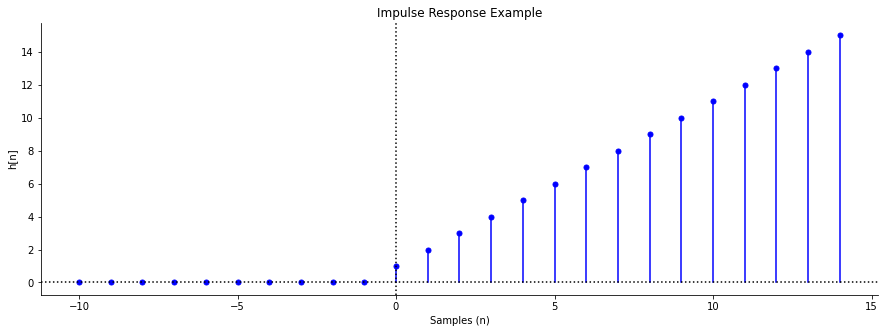

In [67]:
n = np.arange(-10,15)
h = np.cumsum(n>=0)


PlotImpulseResponse(n,h)